In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import itertools
import string as st
import re
import nltk
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from nltk import PorterStemmer, WordNetLemmatizer

In [2]:
data = pd.read_csv('/Users/omar.hassan/Documents/DAEN/DAEN 690/dss_cleanv2.csv')

In [3]:
data = data.convert_dtypes()
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2848 entries, 0 to 2847
Data columns (total 24 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   administrator         2848 non-null   string
 1   capacity              2848 non-null   Int64 
 2   City                  2848 non-null   string
 3   State                 2848 non-null   string
 4   ZIP                   2848 non-null   Int64 
 5   loc_id                2848 non-null   Int64 
 6   inspector_name        2848 non-null   string
 7   license_type          2848 non-null   string
 8   name                  2848 non-null   string
 9   qualification         2830 non-null   string
 10  id                    2848 non-null   Int64 
 11  Month                 2848 non-null   string
 12  Day                   2848 non-null   Int64 
 13  Year                  2848 non-null   Int64 
 14  complaint             2395 non-null   string
 15  areas_reviewed        2832 non-null   

In [4]:
data = data.dropna(subset = ['comments'])

In [5]:
data['complaint'].fillna('Yes', inplace=True)

In [6]:
# Check how the labels are distributed
pd.crosstab(index=data['complaint'], columns='count')

col_0,count
complaint,
No,2387
Yes,453


In [7]:
# Remove all punctuations from the text

def remove_punct(text):
    return ("".join([ch for ch in text if ch not in st.punctuation]))

In [8]:
data['removed_punc'] = data['comments'].apply(lambda x: remove_punct(x))
data.head()

,administrator,capacity,City,State,ZIP,loc_id,inspector_name,license_type,name,qualification,...,areas_reviewed,comments,technical_assistance,complaint_related,description,plan_of_correction,Bucket,Subsection,StandardNumber,removed_punc
0,Kennedy Chase,115,HARDY,VA,24101,35321,Jennifer Stokes,One Year,Smith Mountain Lake Retirement Village,Residential and Assisted Living CareNon-Ambula...,...,22VAC40-73 GENERAL PROVISIONS22VAC40-73 ADMINI...,The LI for Smith Mountain Lake Retirement Vill...,<NA>,<NA>,Based on observations made of the facility med...,LPN or RMA will routinely check all insulins f...,Medication management plan and reference mater...,Facility shall maintain and implement a writte...,22VAC40-73-640-A,The LI for Smith Mountain Lake Retirement Vill...
1,Jeremy Handley,90,SALEM,VA,24153,33314,Holly Copeland,One Year,Brookdale Salem,Residential and Assisted Living CareNon-Ambula...,...,22VAC40-73 GENERAL PROVISIONS22VAC40-73 ADMINI...,"Two LIs completed the renewal inspection, whic...",The facility received technical assistance on ...,<NA>,"Based on observations and document review, the...",1).The expired Novolog Insulin for resident #e...,Medication management plan and reference mater...,Facility shall maintain and implement a writte...,22VAC40-73-640-A,Two LIs completed the renewal inspection which...
2,Vickie Conner,96,WINCHESTER,VA,22603,42368,Rhonda L Whitmer,One Year,Hilltop,Residential and Assisted Living CareNon-Ambula...,...,22VAC40-73 ADMINISTRATION AND ADMINISTRATIVE S...,The information contained in this renewal insp...,Discussion on the following topics occurred: 1...,<NA>,Based upon review of the facility medication m...,The community shall follow the Medication Mana...,Medication management plan and reference mater...,Facility shall maintain and implement a writte...,22VAC40-73-640-A,The information contained in this renewal insp...
3,Laura Fasching,30,NEW MARKET,VA,22844,32972,Rhonda L Whitmer,One Year,"Shenandoah Place, Inc.",Residential and Assisted Living CareNon-Ambula...,...,22VAC40-73 GENERAL PROVISIONS22VAC40-73 ADMINI...,A renewal inspection was conducted by two LIs ...,<NA>,<NA>,"Based on documentation, the facility failed to...","Laura Fasching, LPNM, Facility Manager, will c...",Medication management plan and reference mater...,Facility shall maintain and implement a writte...,22VAC40-73-640-A,A renewal inspection was conducted by two LIs ...
4,James Floyd,125,BRISTOL,VA,24201,28936,Crystal Mullins,One Year,Brookdale Bristol,Residential and Assisted Living CareNon-Ambula...,...,22VAC40-73 GENERAL PROVISIONS22VAC40-73 ADMINI...,Two licensing inspectors conducted an unannoun...,<NA>,<NA>,Based on review of the medication management p...,<NA>,Medication management plan and reference mater...,Facility shall maintain and implement a writte...,22VAC40-73-640-A,Two licensing inspectors conducted an unannoun...


In [9]:
''' Convert text to lower case tokens. Here, split() is applied on white-spaces. But, it could be applied
    on special characters, tabs or any other string based on which text is to be seperated into tokens.
'''
def tokenize(text):
    text = re.split('\s+' ,text)
    return [x.lower() for x in text]

In [10]:
data['tokens'] = data['removed_punc'].apply(lambda msg : tokenize(msg))
data.head()

,administrator,capacity,City,State,ZIP,loc_id,inspector_name,license_type,name,qualification,...,comments,technical_assistance,complaint_related,description,plan_of_correction,Bucket,Subsection,StandardNumber,removed_punc,tokens
0,Kennedy Chase,115,HARDY,VA,24101,35321,Jennifer Stokes,One Year,Smith Mountain Lake Retirement Village,Residential and Assisted Living CareNon-Ambula...,...,The LI for Smith Mountain Lake Retirement Vill...,<NA>,<NA>,Based on observations made of the facility med...,LPN or RMA will routinely check all insulins f...,Medication management plan and reference mater...,Facility shall maintain and implement a writte...,22VAC40-73-640-A,The LI for Smith Mountain Lake Retirement Vill...,"[the, li, for, smith, mountain, lake, retireme..."
1,Jeremy Handley,90,SALEM,VA,24153,33314,Holly Copeland,One Year,Brookdale Salem,Residential and Assisted Living CareNon-Ambula...,...,"Two LIs completed the renewal inspection, whic...",The facility received technical assistance on ...,<NA>,"Based on observations and document review, the...",1).The expired Novolog Insulin for resident #e...,Medication management plan and reference mater...,Facility shall maintain and implement a writte...,22VAC40-73-640-A,Two LIs completed the renewal inspection which...,"[two, lis, completed, the, renewal, inspection..."
2,Vickie Conner,96,WINCHESTER,VA,22603,42368,Rhonda L Whitmer,One Year,Hilltop,Residential and Assisted Living CareNon-Ambula...,...,The information contained in this renewal insp...,Discussion on the following topics occurred: 1...,<NA>,Based upon review of the facility medication m...,The community shall follow the Medication Mana...,Medication management plan and reference mater...,Facility shall maintain and implement a writte...,22VAC40-73-640-A,The information contained in this renewal insp...,"[the, information, contained, in, this, renewa..."
3,Laura Fasching,30,NEW MARKET,VA,22844,32972,Rhonda L Whitmer,One Year,"Shenandoah Place, Inc.",Residential and Assisted Living CareNon-Ambula...,...,A renewal inspection was conducted by two LIs ...,<NA>,<NA>,"Based on documentation, the facility failed to...","Laura Fasching, LPNM, Facility Manager, will c...",Medication management plan and reference mater...,Facility shall maintain and implement a writte...,22VAC40-73-640-A,A renewal inspection was conducted by two LIs ...,"[a, renewal, inspection, was, conducted, by, t..."
4,James Floyd,125,BRISTOL,VA,24201,28936,Crystal Mullins,One Year,Brookdale Bristol,Residential and Assisted Living CareNon-Ambula...,...,Two licensing inspectors conducted an unannoun...,<NA>,<NA>,Based on review of the medication management p...,<NA>,Medication management plan and reference mater...,Facility shall maintain and implement a writte...,22VAC40-73-640-A,Two licensing inspectors conducted an unannoun...,"[two, licensing, inspectors, conducted, an, un..."


In [11]:
# Remove tokens of length less than 3
def remove_small_words(text):
    return [x for x in text if len(x) > 3 ]

In [12]:
data['filtered_tokens'] = data['tokens'].apply(lambda x : remove_small_words(x))
data.head()

,administrator,capacity,City,State,ZIP,loc_id,inspector_name,license_type,name,qualification,...,technical_assistance,complaint_related,description,plan_of_correction,Bucket,Subsection,StandardNumber,removed_punc,tokens,filtered_tokens
0,Kennedy Chase,115,HARDY,VA,24101,35321,Jennifer Stokes,One Year,Smith Mountain Lake Retirement Village,Residential and Assisted Living CareNon-Ambula...,...,<NA>,<NA>,Based on observations made of the facility med...,LPN or RMA will routinely check all insulins f...,Medication management plan and reference mater...,Facility shall maintain and implement a writte...,22VAC40-73-640-A,The LI for Smith Mountain Lake Retirement Vill...,"[the, li, for, smith, mountain, lake, retireme...","[smith, mountain, lake, retirement, village, c..."
1,Jeremy Handley,90,SALEM,VA,24153,33314,Holly Copeland,One Year,Brookdale Salem,Residential and Assisted Living CareNon-Ambula...,...,The facility received technical assistance on ...,<NA>,"Based on observations and document review, the...",1).The expired Novolog Insulin for resident #e...,Medication management plan and reference mater...,Facility shall maintain and implement a writte...,22VAC40-73-640-A,Two LIs completed the renewal inspection which...,"[two, lis, completed, the, renewal, inspection...","[completed, renewal, inspection, which, result..."
2,Vickie Conner,96,WINCHESTER,VA,22603,42368,Rhonda L Whitmer,One Year,Hilltop,Residential and Assisted Living CareNon-Ambula...,...,Discussion on the following topics occurred: 1...,<NA>,Based upon review of the facility medication m...,The community shall follow the Medication Mana...,Medication management plan and reference mater...,Facility shall maintain and implement a writte...,22VAC40-73-640-A,The information contained in this renewal insp...,"[the, information, contained, in, this, renewa...","[information, contained, this, renewal, inspec..."
3,Laura Fasching,30,NEW MARKET,VA,22844,32972,Rhonda L Whitmer,One Year,"Shenandoah Place, Inc.",Residential and Assisted Living CareNon-Ambula...,...,<NA>,<NA>,"Based on documentation, the facility failed to...","Laura Fasching, LPNM, Facility Manager, will c...",Medication management plan and reference mater...,Facility shall maintain and implement a writte...,22VAC40-73-640-A,A renewal inspection was conducted by two LIs ...,"[a, renewal, inspection, was, conducted, by, t...","[renewal, inspection, conducted, 03212022, cen..."
4,James Floyd,125,BRISTOL,VA,24201,28936,Crystal Mullins,One Year,Brookdale Bristol,Residential and Assisted Living CareNon-Ambula...,...,<NA>,<NA>,Based on review of the medication management p...,<NA>,Medication management plan and reference mater...,Facility shall maintain and implement a writte...,22VAC40-73-640-A,Two licensing inspectors conducted an unannoun...,"[two, licensing, inspectors, conducted, an, un...","[licensing, inspectors, conducted, unannounced..."


In [13]:
import nltk
from nltk.corpus import stopwords

In [14]:
''' Remove stopwords. Here, NLTK corpus list is used for a match. However, a customized user-defined 
    list could be created and used to limit the matches in input text. 
'''
def remove_stopwords(text):
    return [word for word in text if word not in stopwords.words('english')]

In [15]:
data['clean_tokens'] = data['filtered_tokens'].apply(lambda x : remove_stopwords(x))
data.head()

,administrator,capacity,City,State,ZIP,loc_id,inspector_name,license_type,name,qualification,...,complaint_related,description,plan_of_correction,Bucket,Subsection,StandardNumber,removed_punc,tokens,filtered_tokens,clean_tokens
0,Kennedy Chase,115,HARDY,VA,24101,35321,Jennifer Stokes,One Year,Smith Mountain Lake Retirement Village,Residential and Assisted Living CareNon-Ambula...,...,<NA>,Based on observations made of the facility med...,LPN or RMA will routinely check all insulins f...,Medication management plan and reference mater...,Facility shall maintain and implement a writte...,22VAC40-73-640-A,The LI for Smith Mountain Lake Retirement Vill...,"[the, li, for, smith, mountain, lake, retireme...","[smith, mountain, lake, retirement, village, c...","[smith, mountain, lake, retirement, village, c..."
1,Jeremy Handley,90,SALEM,VA,24153,33314,Holly Copeland,One Year,Brookdale Salem,Residential and Assisted Living CareNon-Ambula...,...,<NA>,"Based on observations and document review, the...",1).The expired Novolog Insulin for resident #e...,Medication management plan and reference mater...,Facility shall maintain and implement a writte...,22VAC40-73-640-A,Two LIs completed the renewal inspection which...,"[two, lis, completed, the, renewal, inspection...","[completed, renewal, inspection, which, result...","[completed, renewal, inspection, resulted, vio..."
2,Vickie Conner,96,WINCHESTER,VA,22603,42368,Rhonda L Whitmer,One Year,Hilltop,Residential and Assisted Living CareNon-Ambula...,...,<NA>,Based upon review of the facility medication m...,The community shall follow the Medication Mana...,Medication management plan and reference mater...,Facility shall maintain and implement a writte...,22VAC40-73-640-A,The information contained in this renewal insp...,"[the, information, contained, in, this, renewa...","[information, contained, this, renewal, inspec...","[information, contained, renewal, inspection, ..."
3,Laura Fasching,30,NEW MARKET,VA,22844,32972,Rhonda L Whitmer,One Year,"Shenandoah Place, Inc.",Residential and Assisted Living CareNon-Ambula...,...,<NA>,"Based on documentation, the facility failed to...","Laura Fasching, LPNM, Facility Manager, will c...",Medication management plan and reference mater...,Facility shall maintain and implement a writte...,22VAC40-73-640-A,A renewal inspection was conducted by two LIs ...,"[a, renewal, inspection, was, conducted, by, t...","[renewal, inspection, conducted, 03212022, cen...","[renewal, inspection, conducted, 03212022, cen..."
4,James Floyd,125,BRISTOL,VA,24201,28936,Crystal Mullins,One Year,Brookdale Bristol,Residential and Assisted Living CareNon-Ambula...,...,<NA>,Based on review of the medication management p...,<NA>,Medication management plan and reference mater...,Facility shall maintain and implement a writte...,22VAC40-73-640-A,Two licensing inspectors conducted an unannoun...,"[two, licensing, inspectors, conducted, an, un...","[licensing, inspectors, conducted, unannounced...","[licensing, inspectors, conducted, unannounced..."


In [16]:
# Apply lemmatization on tokens
def lemmatize(text):
    word_net = WordNetLemmatizer()
    return [word_net.lemmatize(word) for word in text]

In [17]:
data['lemma_words'] = data['clean_tokens'].apply(lambda x : lemmatize(x))
data.head()

,administrator,capacity,City,State,ZIP,loc_id,inspector_name,license_type,name,qualification,...,description,plan_of_correction,Bucket,Subsection,StandardNumber,removed_punc,tokens,filtered_tokens,clean_tokens,lemma_words
0,Kennedy Chase,115,HARDY,VA,24101,35321,Jennifer Stokes,One Year,Smith Mountain Lake Retirement Village,Residential and Assisted Living CareNon-Ambula...,...,Based on observations made of the facility med...,LPN or RMA will routinely check all insulins f...,Medication management plan and reference mater...,Facility shall maintain and implement a writte...,22VAC40-73-640-A,The LI for Smith Mountain Lake Retirement Vill...,"[the, li, for, smith, mountain, lake, retireme...","[smith, mountain, lake, retirement, village, c...","[smith, mountain, lake, retirement, village, c...","[smith, mountain, lake, retirement, village, c..."
1,Jeremy Handley,90,SALEM,VA,24153,33314,Holly Copeland,One Year,Brookdale Salem,Residential and Assisted Living CareNon-Ambula...,...,"Based on observations and document review, the...",1).The expired Novolog Insulin for resident #e...,Medication management plan and reference mater...,Facility shall maintain and implement a writte...,22VAC40-73-640-A,Two LIs completed the renewal inspection which...,"[two, lis, completed, the, renewal, inspection...","[completed, renewal, inspection, which, result...","[completed, renewal, inspection, resulted, vio...","[completed, renewal, inspection, resulted, vio..."
2,Vickie Conner,96,WINCHESTER,VA,22603,42368,Rhonda L Whitmer,One Year,Hilltop,Residential and Assisted Living CareNon-Ambula...,...,Based upon review of the facility medication m...,The community shall follow the Medication Mana...,Medication management plan and reference mater...,Facility shall maintain and implement a writte...,22VAC40-73-640-A,The information contained in this renewal insp...,"[the, information, contained, in, this, renewa...","[information, contained, this, renewal, inspec...","[information, contained, renewal, inspection, ...","[information, contained, renewal, inspection, ..."
3,Laura Fasching,30,NEW MARKET,VA,22844,32972,Rhonda L Whitmer,One Year,"Shenandoah Place, Inc.",Residential and Assisted Living CareNon-Ambula...,...,"Based on documentation, the facility failed to...","Laura Fasching, LPNM, Facility Manager, will c...",Medication management plan and reference mater...,Facility shall maintain and implement a writte...,22VAC40-73-640-A,A renewal inspection was conducted by two LIs ...,"[a, renewal, inspection, was, conducted, by, t...","[renewal, inspection, conducted, 03212022, cen...","[renewal, inspection, conducted, 03212022, cen...","[renewal, inspection, conducted, 03212022, cen..."
4,James Floyd,125,BRISTOL,VA,24201,28936,Crystal Mullins,One Year,Brookdale Bristol,Residential and Assisted Living CareNon-Ambula...,...,Based on review of the medication management p...,<NA>,Medication management plan and reference mater...,Facility shall maintain and implement a writte...,22VAC40-73-640-A,Two licensing inspectors conducted an unannoun...,"[two, licensing, inspectors, conducted, an, un...","[licensing, inspectors, conducted, unannounced...","[licensing, inspectors, conducted, unannounced...","[licensing, inspector, conducted, unannounced,..."


In [18]:
# Create sentences to get clean text as input for vectors

def return_sentences(tokens):
    return " ".join([word for word in tokens])

In [19]:
data['clean_text'] = data['lemma_words'].apply(lambda x : return_sentences(x))
data.head()

,administrator,capacity,City,State,ZIP,loc_id,inspector_name,license_type,name,qualification,...,plan_of_correction,Bucket,Subsection,StandardNumber,removed_punc,tokens,filtered_tokens,clean_tokens,lemma_words,clean_text
0,Kennedy Chase,115,HARDY,VA,24101,35321,Jennifer Stokes,One Year,Smith Mountain Lake Retirement Village,Residential and Assisted Living CareNon-Ambula...,...,LPN or RMA will routinely check all insulins f...,Medication management plan and reference mater...,Facility shall maintain and implement a writte...,22VAC40-73-640-A,The LI for Smith Mountain Lake Retirement Vill...,"[the, li, for, smith, mountain, lake, retireme...","[smith, mountain, lake, retirement, village, c...","[smith, mountain, lake, retirement, village, c...","[smith, mountain, lake, retirement, village, c...",smith mountain lake retirement village conduct...
1,Jeremy Handley,90,SALEM,VA,24153,33314,Holly Copeland,One Year,Brookdale Salem,Residential and Assisted Living CareNon-Ambula...,...,1).The expired Novolog Insulin for resident #e...,Medication management plan and reference mater...,Facility shall maintain and implement a writte...,22VAC40-73-640-A,Two LIs completed the renewal inspection which...,"[two, lis, completed, the, renewal, inspection...","[completed, renewal, inspection, which, result...","[completed, renewal, inspection, resulted, vio...","[completed, renewal, inspection, resulted, vio...",completed renewal inspection resulted violatio...
2,Vickie Conner,96,WINCHESTER,VA,22603,42368,Rhonda L Whitmer,One Year,Hilltop,Residential and Assisted Living CareNon-Ambula...,...,The community shall follow the Medication Mana...,Medication management plan and reference mater...,Facility shall maintain and implement a writte...,22VAC40-73-640-A,The information contained in this renewal insp...,"[the, information, contained, in, this, renewa...","[information, contained, this, renewal, inspec...","[information, contained, renewal, inspection, ...","[information, contained, renewal, inspection, ...",information contained renewal inspection repor...
3,Laura Fasching,30,NEW MARKET,VA,22844,32972,Rhonda L Whitmer,One Year,"Shenandoah Place, Inc.",Residential and Assisted Living CareNon-Ambula...,...,"Laura Fasching, LPNM, Facility Manager, will c...",Medication management plan and reference mater...,Facility shall maintain and implement a writte...,22VAC40-73-640-A,A renewal inspection was conducted by two LIs ...,"[a, renewal, inspection, was, conducted, by, t...","[renewal, inspection, conducted, 03212022, cen...","[renewal, inspection, conducted, 03212022, cen...","[renewal, inspection, conducted, 03212022, cen...",renewal inspection conducted 03212022 census r...
4,James Floyd,125,BRISTOL,VA,24201,28936,Crystal Mullins,One Year,Brookdale Bristol,Residential and Assisted Living CareNon-Ambula...,...,<NA>,Medication management plan and reference mater...,Facility shall maintain and implement a writte...,22VAC40-73-640-A,Two licensing inspectors conducted an unannoun...,"[two, licensing, inspectors, conducted, an, un...","[licensing, inspectors, conducted, unannounced...","[licensing, inspectors, conducted, unannounced...","[licensing, inspector, conducted, unannounced,...",licensing inspector conducted unannounced mand...


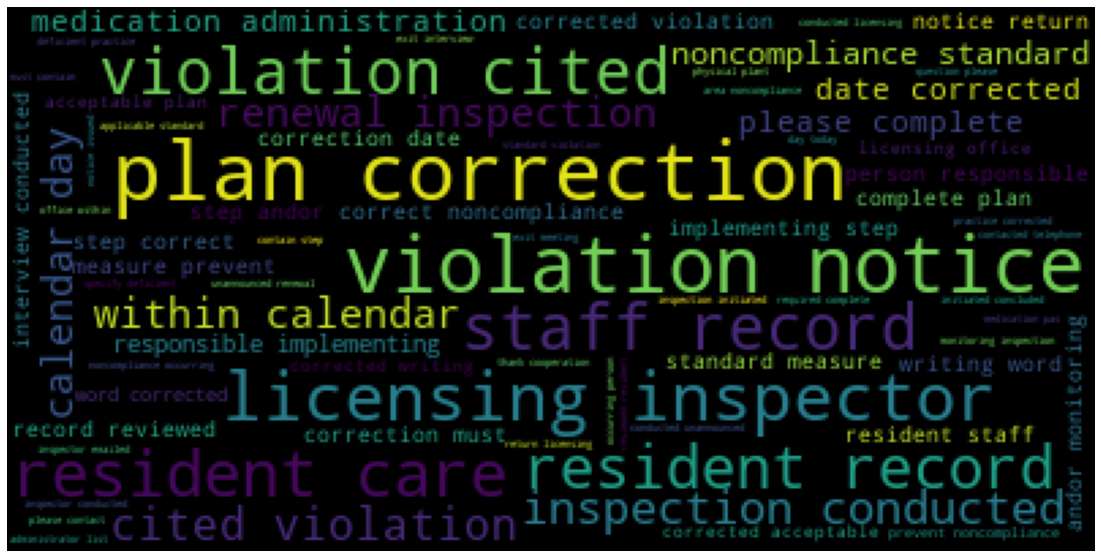

In [20]:
# Generate a basic word cloud 
from wordcloud import WordCloud, ImageColorGenerator

text = " ".join([x for x in data['clean_text']])
# Create and generate a word cloud image:
wordcloud = WordCloud(max_font_size=30, max_words=1000).generate(text)

# Display the generated image:
plt.figure(figsize= [20,10])
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

In [21]:
# Prepare data for the model. Convert label in to binary

data['complaint'] = [1 if x == 'Yes' else 0 for x in data['complaint']]
data.head()
data['complaint'].value_counts()

0    2387
1     453
Name: complaint, dtype: int64

In [22]:
# Split the dataset

X_train,X_test,y_train,y_test = train_test_split(data['clean_text'], data['complaint'], test_size=0.2, random_state = 5)

print(X_train.shape)
print(X_test.shape)

(2272,)
(568,)


In [23]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer()
tfidf_train = tfidf.fit_transform(X_train)
tfidf_test = tfidf.transform(X_test)

print(tfidf_train.toarray())
print(tfidf_train.shape)
print(tfidf_test.toarray())
print(tfidf_test.shape)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
(2272, 4936)
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
(568, 4936)


In [24]:
# import Gaussian Naive Bayes model
from sklearn.naive_bayes import GaussianNB

# create a Gaussian Classifier
classifer = GaussianNB()

# train the model using the training sets
classifer.fit(tfidf_train.toarray(), y_train)

# predict the response for test dataset
ypred = classifer.predict(tfidf_test.toarray())

Naive Bayes model fitted..
Accuracy: 0.9295774647887324
Classification Report: Naive Bayes
              precision    recall  f1-score   support

           0       0.93      0.98      0.96       463
           1       0.90      0.70      0.78       105

    accuracy                           0.93       568
   macro avg       0.92      0.84      0.87       568
weighted avg       0.93      0.93      0.93       568



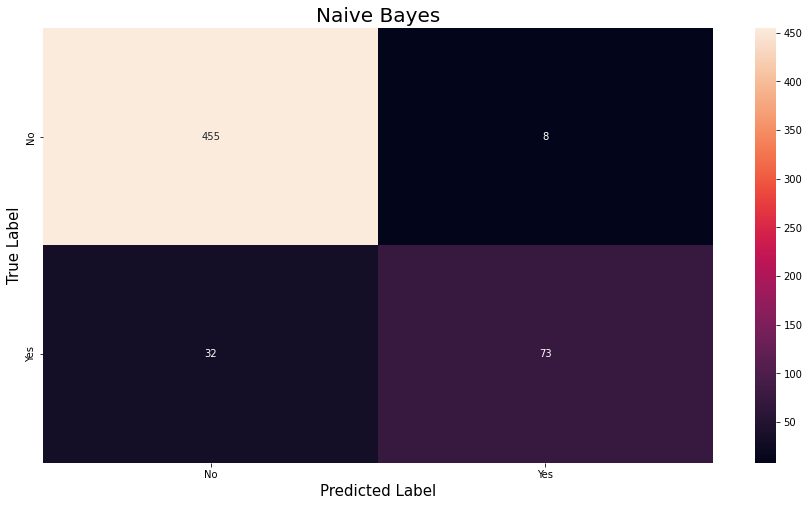

In [25]:
print('Naive Bayes model fitted..')

nb_accuracy = accuracy_score(y_test,ypred)
print('Accuracy:',nb_accuracy)

# passing actual and predicted values
nb_cm = confusion_matrix(y_test, ypred)

nb_cr = classification_report(y_test, ypred)
print('Classification Report: Naive Bayes')
print (nb_cr)

# true Write data values in each cell of the matrix
plt.figure(figsize = (15,8))
sns.heatmap(nb_cm, annot=True, fmt='.0f', yticklabels=('No','Yes'),xticklabels=('No','Yes'))
plt.title('Naive Bayes', fontsize = 20) # title with fontsize 20
plt.xlabel('Predicted Label', fontsize = 15) # x-axis label with fontsize 15
plt.ylabel('True Label', fontsize = 15) # y-axis label with fontsize 15

plt.show()

In [26]:
# KNN
from sklearn.neighbors import KNeighborsClassifier
knn_clf=KNeighborsClassifier()
knn_clf.fit(tfidf_train,y_train)
ypred=knn_clf.predict(tfidf_test) #These are the predicted output values

KNN model fitted..
Accuracy: 0.9700704225352113
Classification Report: KNN
              precision    recall  f1-score   support

           0       0.97      1.00      0.98       463
           1       0.98      0.86      0.91       105

    accuracy                           0.97       568
   macro avg       0.97      0.93      0.95       568
weighted avg       0.97      0.97      0.97       568



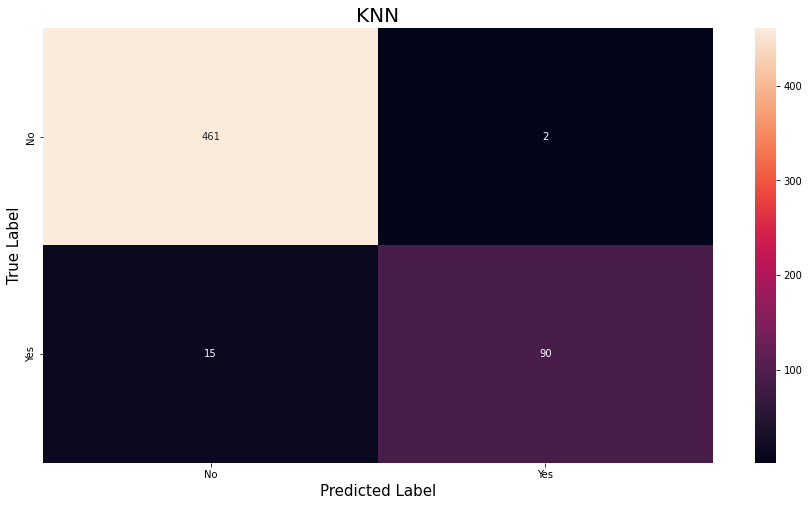

In [27]:
print('KNN model fitted..')

knn_accuracy = accuracy_score(y_test,ypred)
print('Accuracy:',knn_accuracy)

# passing actual and predicted values
knn_cm = confusion_matrix(y_test, ypred)

knn_cr = classification_report(y_test, ypred)
print('Classification Report: KNN')
print (knn_cr)

# true Write data values in each cell of the matrix
plt.figure(figsize = (15,8))
sns.heatmap(knn_cm, annot=True, fmt='.0f', yticklabels=('No','Yes'),xticklabels=('No','Yes'))
plt.title('KNN', fontsize = 20) # title with fontsize 20
plt.xlabel('Predicted Label', fontsize = 15) # x-axis label with fontsize 15
plt.ylabel('True Label', fontsize = 15) # y-axis label with fontsize 15

plt.show()

In [28]:
# Logistic Regression model
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(max_iter = 500)
lr.fit(tfidf_train, y_train)
ypred = lr.predict(tfidf_test)

Logistic Regression model fitted..
Accuracy: 0.977112676056338
Classification Report: Logistic Regression
              precision    recall  f1-score   support

           0       0.97      1.00      0.99       463
           1       1.00      0.88      0.93       105

    accuracy                           0.98       568
   macro avg       0.99      0.94      0.96       568
weighted avg       0.98      0.98      0.98       568



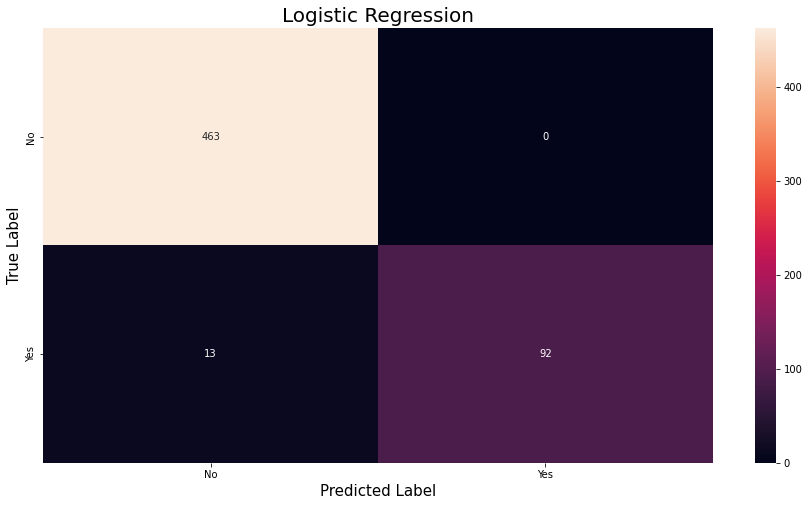

In [29]:
print('Logistic Regression model fitted..')

lr_accuracy = accuracy_score(y_test,ypred)
print('Accuracy:',lr_accuracy)

# passing actual and predicted values
lr_cm = confusion_matrix(y_test, ypred)

lr_cr = classification_report(y_test, ypred)
print('Classification Report: Logistic Regression')
print (lr_cr)

# true Write data values in each cell of the matrix
plt.figure(figsize = (15,8))
sns.heatmap(lr_cm, annot=True, fmt='.0f', yticklabels=('No','Yes'),xticklabels=('No','Yes'))
plt.title('Logistic Regression', fontsize = 20) # title with fontsize 20
plt.xlabel('Predicted Label', fontsize = 15) # x-axis label with fontsize 15
plt.ylabel('True Label', fontsize = 15) # y-axis label with fontsize 15

plt.show()